In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


## 1. Preparar os dados


In [21]:
df = pd.read_csv('../data/raw/comensais22-24 - Planilha1.csv')

df.info()
df.head()
df.columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data              437 non-null    object 
 1   Comensais_almoço  436 non-null    float64
 2   Comensais_janta   433 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.4+ KB


['Data', 'Comensais_almoço', 'Comensais_janta']

In [ ]:

df.columns = df.columns.str.strip()

df.columns = df.columns.str.strip() 
df = df.rename(columns={
    "Comensais_almoço": "almoco",
    "Comensais_janta": "janta",
    "Data": "ds"
})

df.columns


Index(['ds', 'almoco', 'janta', 'ds', 'y_almoço', 'y_janta'], dtype='object')

In [32]:
df[['almoco','janta']].describe()


,almoco,janta
count,436.000000,433.000000
mean,331.708716,249.609700
std,86.084001,77.744046
min,40.000000,25.000000
25%,300.000000,210.000000
50%,350.000000,270.000000
75%,390.000000,300.000000
max,470.000000,400.000000


In [37]:
m_almoço = Prophet(interval_width=0.90)
m_almoço.fit(df_almoço)

future_almoço = m_almoço.make_future_dataframe(periods=90)
forecast_almoço = m_almoço.predict(future_almoço)


12:47:45 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
m_janta = Prophet(interval_width=0.90)
m_janta.fit(df_janta)

future_janta = m_janta.make_future_dataframe(periods=90)
forecast_janta = m_janta.predict(future_janta)


12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] done processing


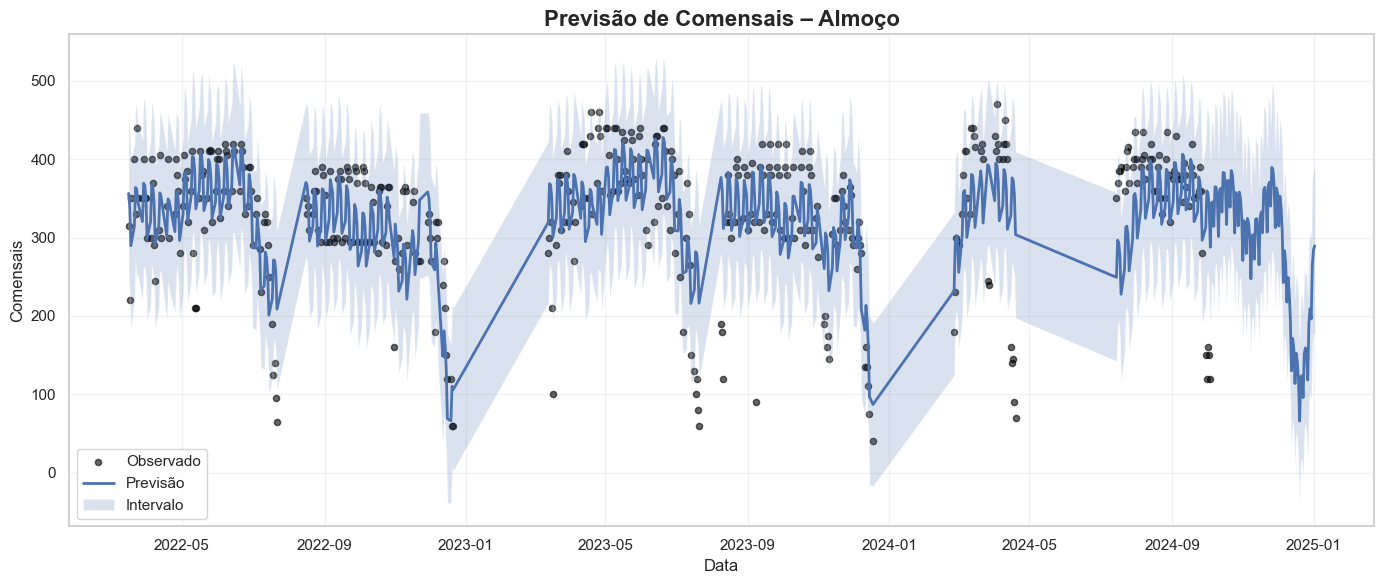

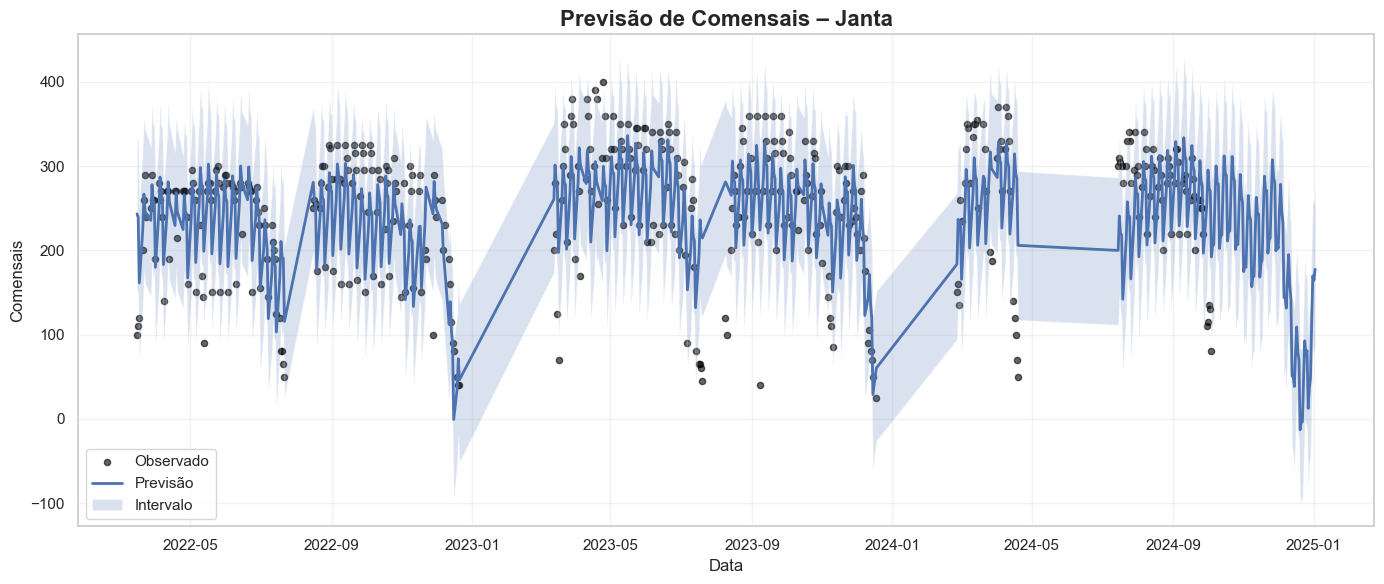

In [39]:
def plot_forecast(model, forecast, titulo):
    fig, ax = plt.subplots(figsize=(14,6))

    # Observado
    ax.scatter(model.history['ds'],
               model.history['y'],
               color='black',
               s=20,
               alpha=0.6,
               label='Observado')

    # Previsão
    ax.plot(forecast['ds'],
            forecast['yhat'],
            linewidth=2,
            label='Previsão')

    # Intervalo
    ax.fill_between(
        forecast['ds'],
        forecast['yhat_lower'],
        forecast['yhat_upper'],
        alpha=0.2,
        label='Intervalo'
    )

    ax.set_title(titulo, fontsize=16, fontweight='bold')
    ax.set_xlabel("Data", fontsize=12)
    ax.set_ylabel("Comensais", fontsize=12)
    ax.grid(alpha=0.25)
    ax.legend()

    plt.tight_layout()
    return fig

fig1 = plot_forecast(m_almoço, forecast_almoço, "Previsão de Comensais – Almoço")
fig2 = plot_forecast(m_janta, forecast_janta, "Previsão de Comensais – Janta")


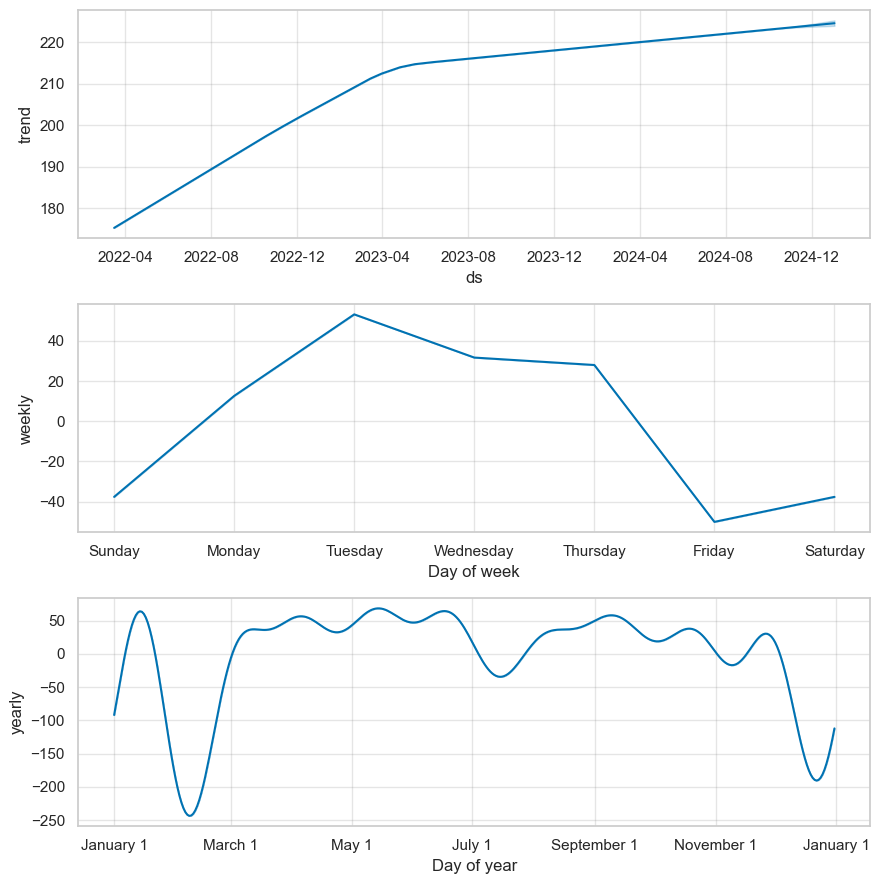

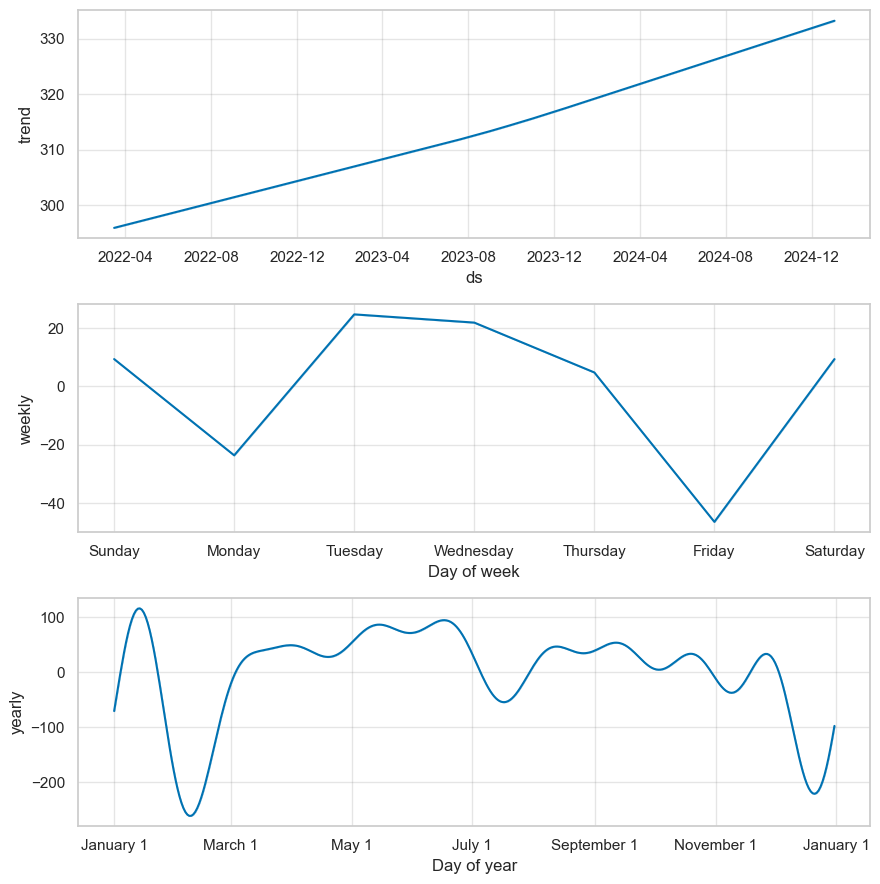

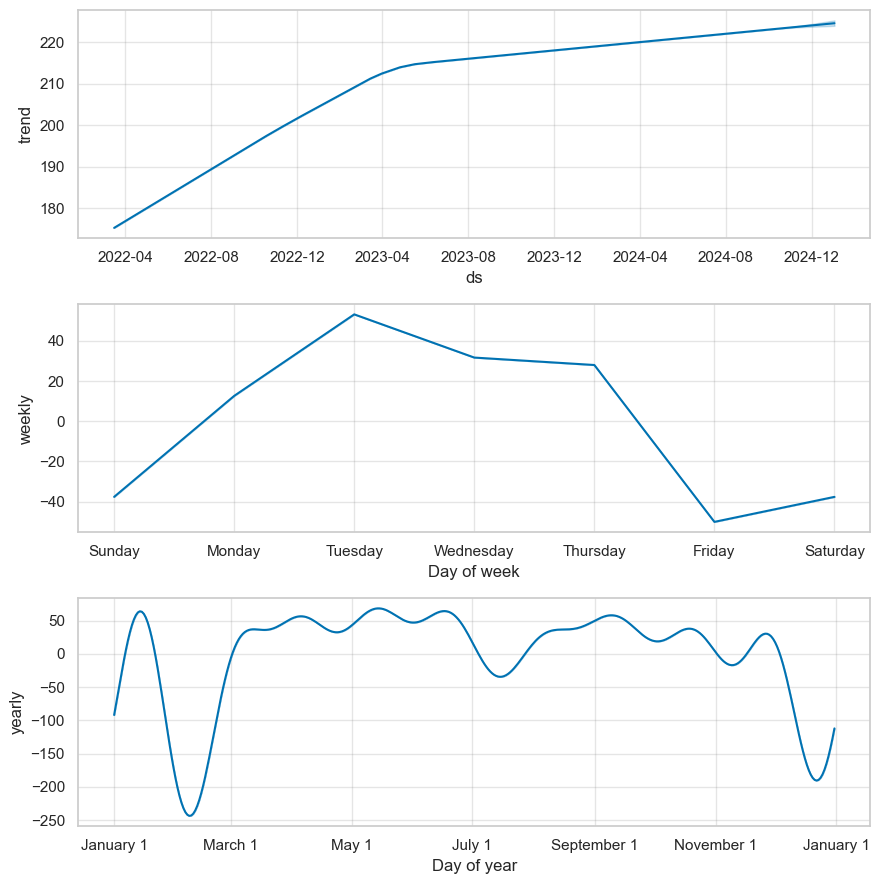

In [40]:
m_almoço.plot_components(forecast_almoço)
m_janta.plot_components(forecast_janta)


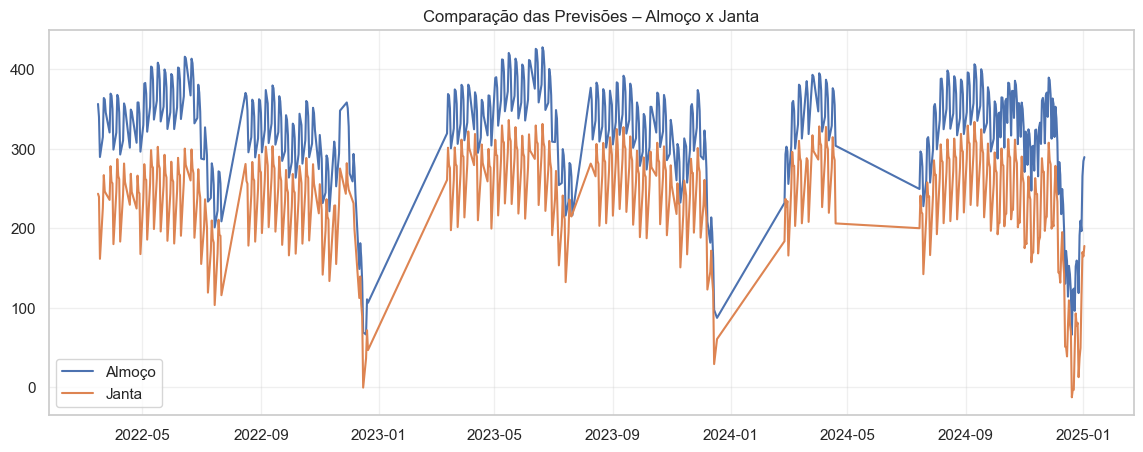

In [41]:
plt.figure(figsize=(14,5))
plt.plot(forecast_almoço['ds'], forecast_almoço['yhat'], label="Almoço")
plt.plot(forecast_janta['ds'], forecast_janta['yhat'], label="Janta")
plt.title("Comparação das Previsões – Almoço x Janta")
plt.legend()
plt.grid(alpha=0.3)


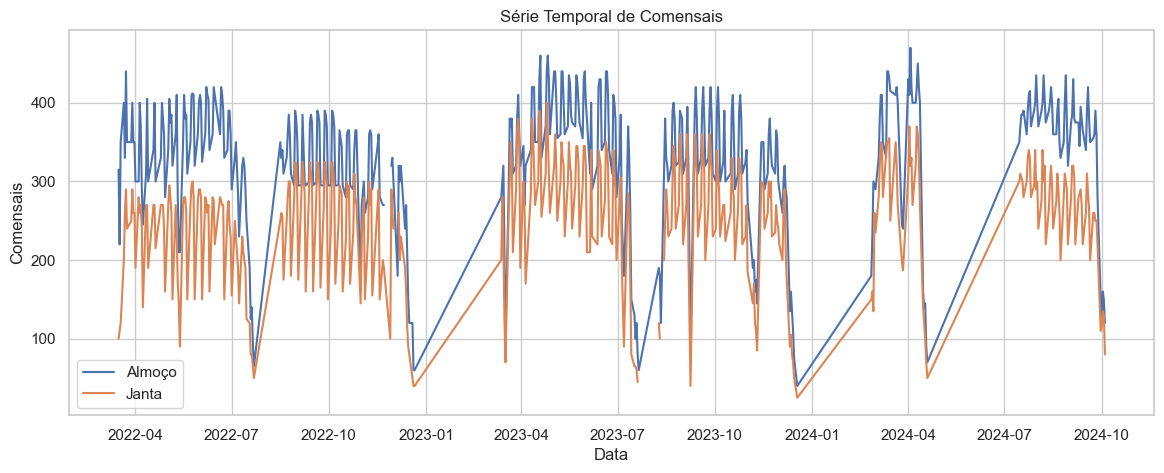

18:46:09 - cmdstanpy - INFO - Chain [1] start processing
18:46:09 - cmdstanpy - INFO - Chain [1] done processing


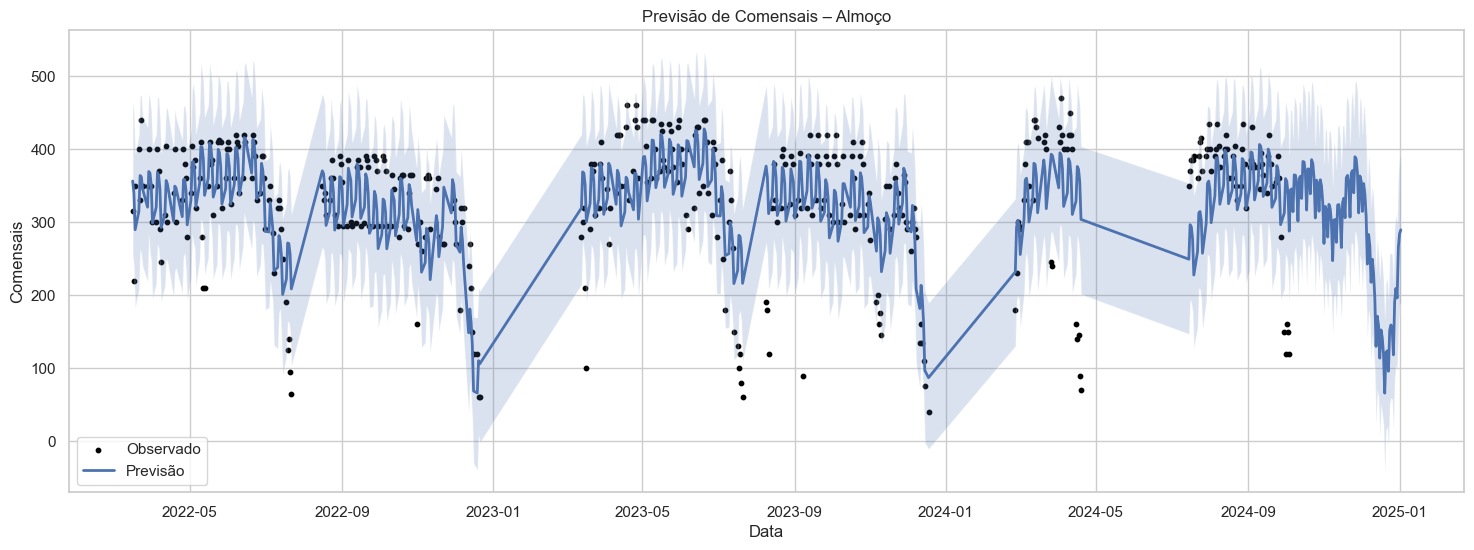

18:46:10 - cmdstanpy - INFO - Chain [1] start processing
18:46:10 - cmdstanpy - INFO - Chain [1] done processing


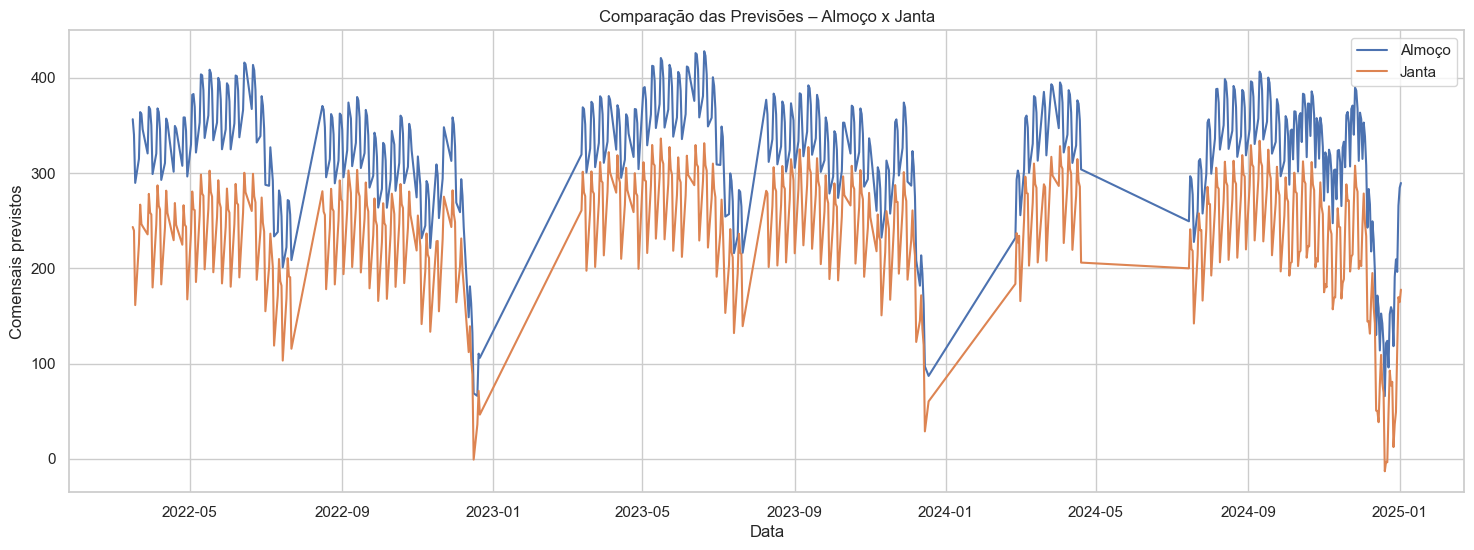

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# 1) Carregar os dados
df = pd.read_csv('../data/raw/comensais22-24 - Planilha1.csv')

# Renomear colunas
df = df.rename(columns={
    "Data": "ds",
    "Comensais_almoço": "almoco",
    "Comensais_janta": "janta"
})

# Garantir tipo datetime
df['ds'] = pd.to_datetime(df['ds'])

# 2) Visualização inicial
df.describe()

plt.figure(figsize=(14,5))
plt.plot(df['ds'], df['almoco'], label="Almoço")
plt.plot(df['ds'], df['janta'], label="Janta")
plt.title("Série Temporal de Comensais")
plt.xlabel("Data")
plt.ylabel("Comensais")
plt.legend()
plt.show()

# 3) Modelagem Prophet – Almoço

df_lunch = df[['ds', 'almoco']].rename(columns={'almoco': 'y'})
model_lunch = Prophet(interval_width=0.90, yearly_seasonality=True, weekly_seasonality=True)
model_lunch.fit(df_lunch)

future_lunch = model_lunch.make_future_dataframe(periods=90)
forecast_lunch = model_lunch.predict(future_lunch)

# 4) Plot – Almoço
fig1, ax1 = plt.subplots(figsize=(18,6))
ax1.scatter(df['ds'], df['almoco'], color='black', s=10, label='Observado')
ax1.plot(forecast_lunch['ds'], forecast_lunch['yhat'], label='Previsão', linewidth=2)
ax1.fill_between(forecast_lunch['ds'], forecast_lunch['yhat_lower'], forecast_lunch['yhat_upper'], alpha=0.2)
plt.title("Previsão de Comensais – Almoço")
plt.xlabel("Data")
plt.ylabel("Comensais")
plt.legend()
plt.show()

# 5) Prophet – Janta
df_dinner = df[['ds', 'janta']].rename(columns={'janta': 'y'})
model_dinner = Prophet(interval_width=0.90, yearly_seasonality=True, weekly_seasonality=True)
model_dinner.fit(df_dinner)

future_dinner = model_dinner.make_future_dataframe(periods=90)
forecast_dinner = model_dinner.predict(future_dinner)

# 6) Comparação das previsões
plt.figure(figsize=(18,6))
plt.plot(forecast_lunch['ds'], forecast_lunch['yhat'], label="Almoço")
plt.plot(forecast_dinner['ds'], forecast_dinner['yhat'], label="Janta")
plt.title("Comparação das Previsões – Almoço x Janta")
plt.xlabel("Data")
plt.ylabel("Comensais previstos")
plt.legend()
plt.show()

# 7) Export final
df_prev_final = pd.DataFrame({
    'ds': forecast_lunch['ds'],
    'yhat_almoco': forecast_lunch['yhat'],
    'yhat_janta': forecast_dinner['yhat']
})

df_prev_final.to_csv('../data/processed/comensais22-24 - Planilha1.csv', index=False)
